In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the dataset
diabetes = load_diabetes()

# Access data and target
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Display the first few rows of X and y
display(X.head())
display(y.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and fit the scaler on the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

display(X_train[:5])
display(X_test[:5])

array([[ 1.49836523,  1.06136988,  0.21990201,  1.13887373,  0.72847289,
         1.05589332, -0.82445065,  0.71103773,  0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, -0.71059105, -0.4249289 ,
         0.27242452, -1.52979055,  1.4842858 , -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711,  1.99247286, -0.30958872,
        -0.32669867, -0.11911075, -0.06221033,  0.3312366 , -0.31866022],
       [-0.621409  , -0.94217861, -0.78466212, -0.63945779, -1.17464007,
        -1.21550781,  0.66460025, -0.83545839, -1.06968217, -2.71929861],
       [-0.54289885, -0.94217861, -1.4239302 , -1.7064567 , -0.79978448,
        -1.11016747,  1.29156905, -1.60870645, -0.80285867, -0.91881982]])

array([[ 0.94879413, -0.94217861, -0.16822504, -0.35492475,  2.63158584,
         2.649166  ,  0.42948695,  0.71103773,  0.65360061, -0.14718605],
       [ 1.96942617, -0.94217861,  0.74501508,  0.42754112, -0.51143404,
        -0.33328244,  0.03763145, -0.83545839, -0.4969087 , -0.49013439],
       [ 1.34134492,  1.06136988, -0.12256303, -0.28379148,  2.17022512,
         1.04272578,  1.21319795, -0.06221033,  1.74360703, -0.4043973 ],
       [ 2.04793633, -0.94217861,  1.06464912,  1.61333258,  1.16099856,
         0.78595869, -1.60816166,  2.95345711,  2.04001396,  1.22460733],
       [ 0.24220272,  1.06136988, -0.46502808, -0.0703917 ,  0.81497802,
         1.13489858, -0.11911075,  0.71103773, -0.13312789, -0.23292313]])

In [3]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 2959.18
R-squared (R²) Score: 0.44


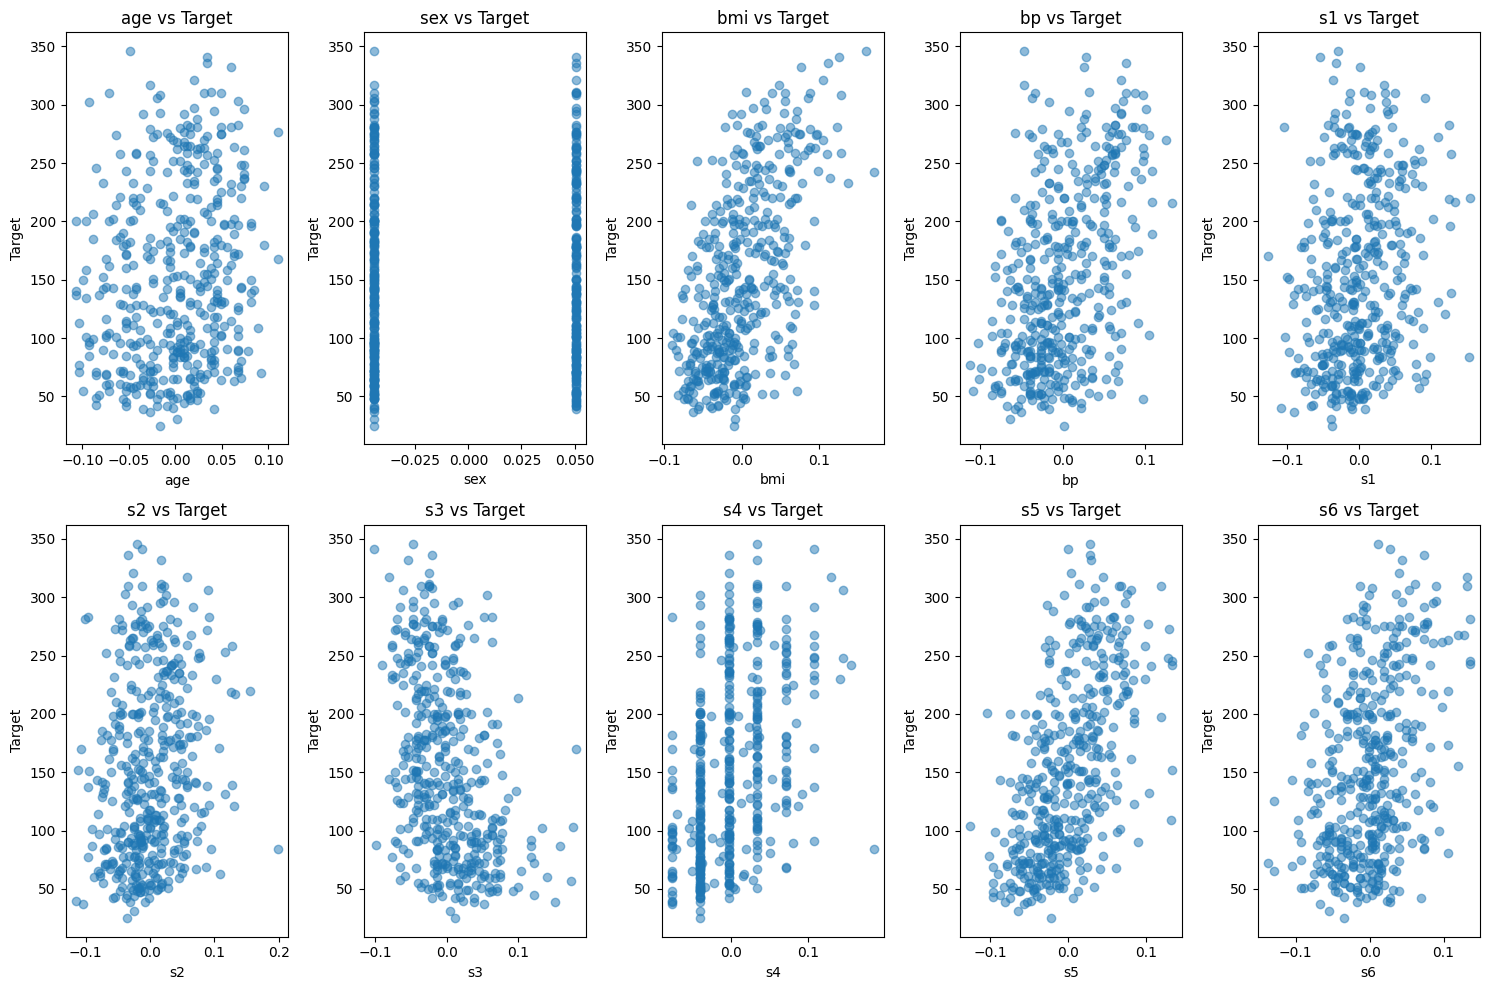

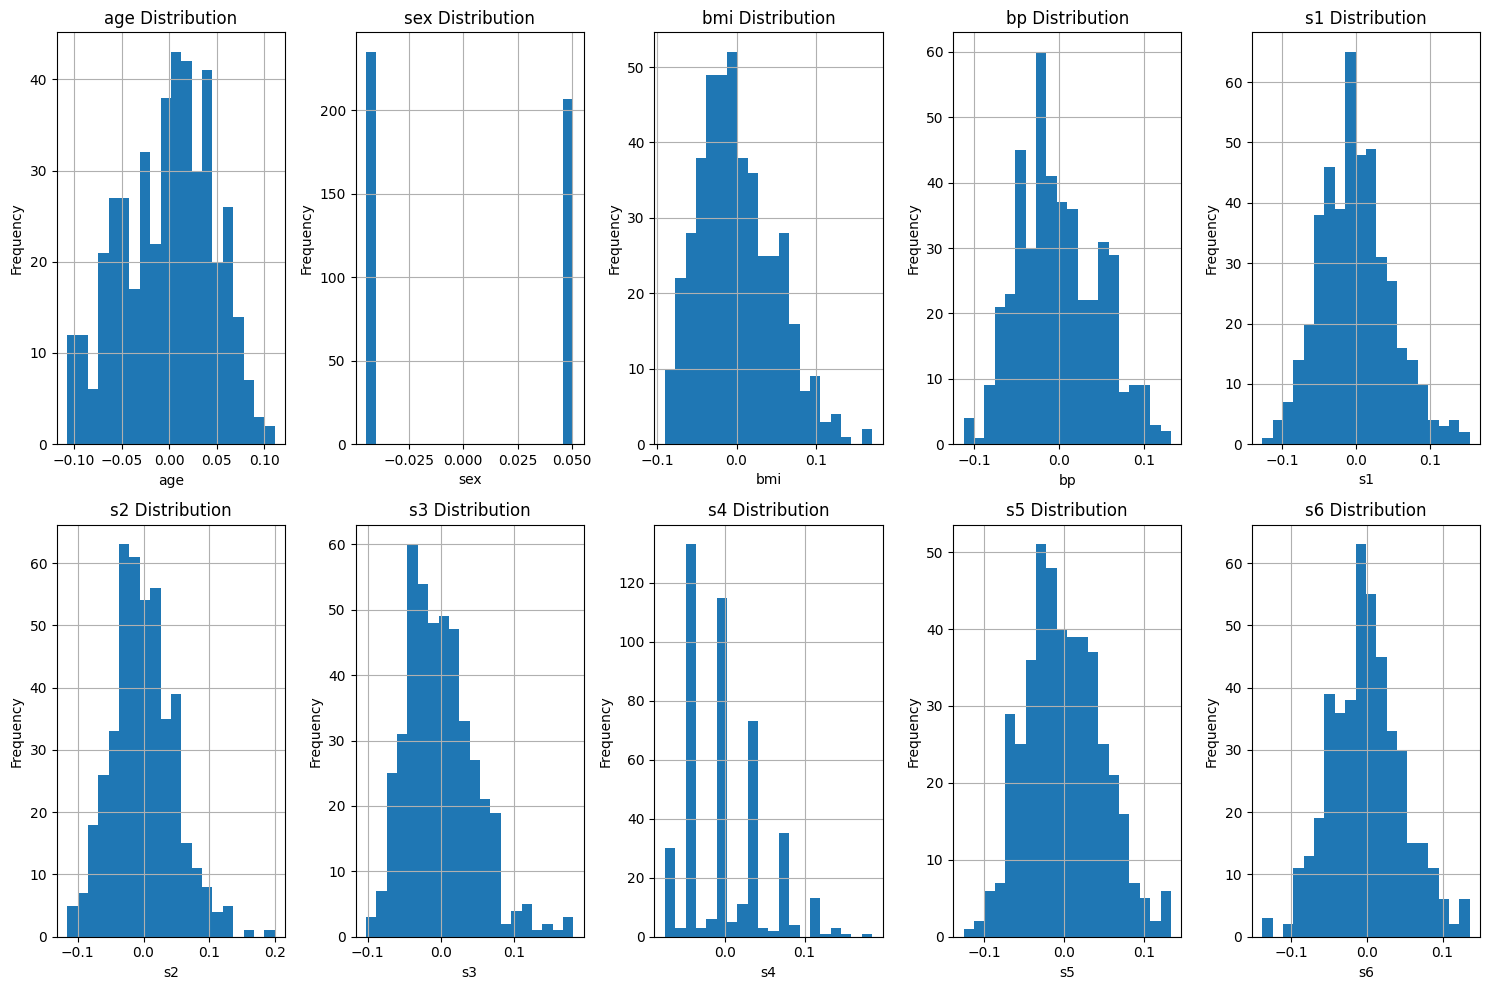

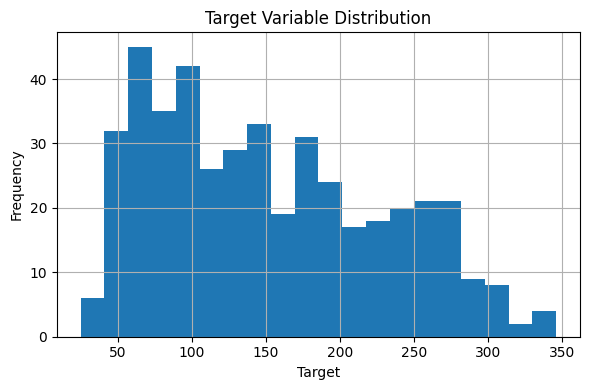

In [5]:
import matplotlib.pyplot as plt

# Scatter plots of each feature against the target
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    plt.scatter(X[col], y, alpha=0.5)
    plt.title(f'{col} vs Target')
    plt.xlabel(col)
    plt.ylabel('Target')
plt.tight_layout()
plt.show()

# Histograms of each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    X[col].hist(bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Histogram of the target variable
plt.figure(figsize=(6, 4))
y.hist(bins=20)
plt.title('Target Variable Distribution')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Preprocessing

### Subtask:
Visualize the distributions of features before and after scaling using histograms or box plots to show the effect of preprocessing.


**Reasoning**:
Create subplots to visualize the distributions of original features using histograms.



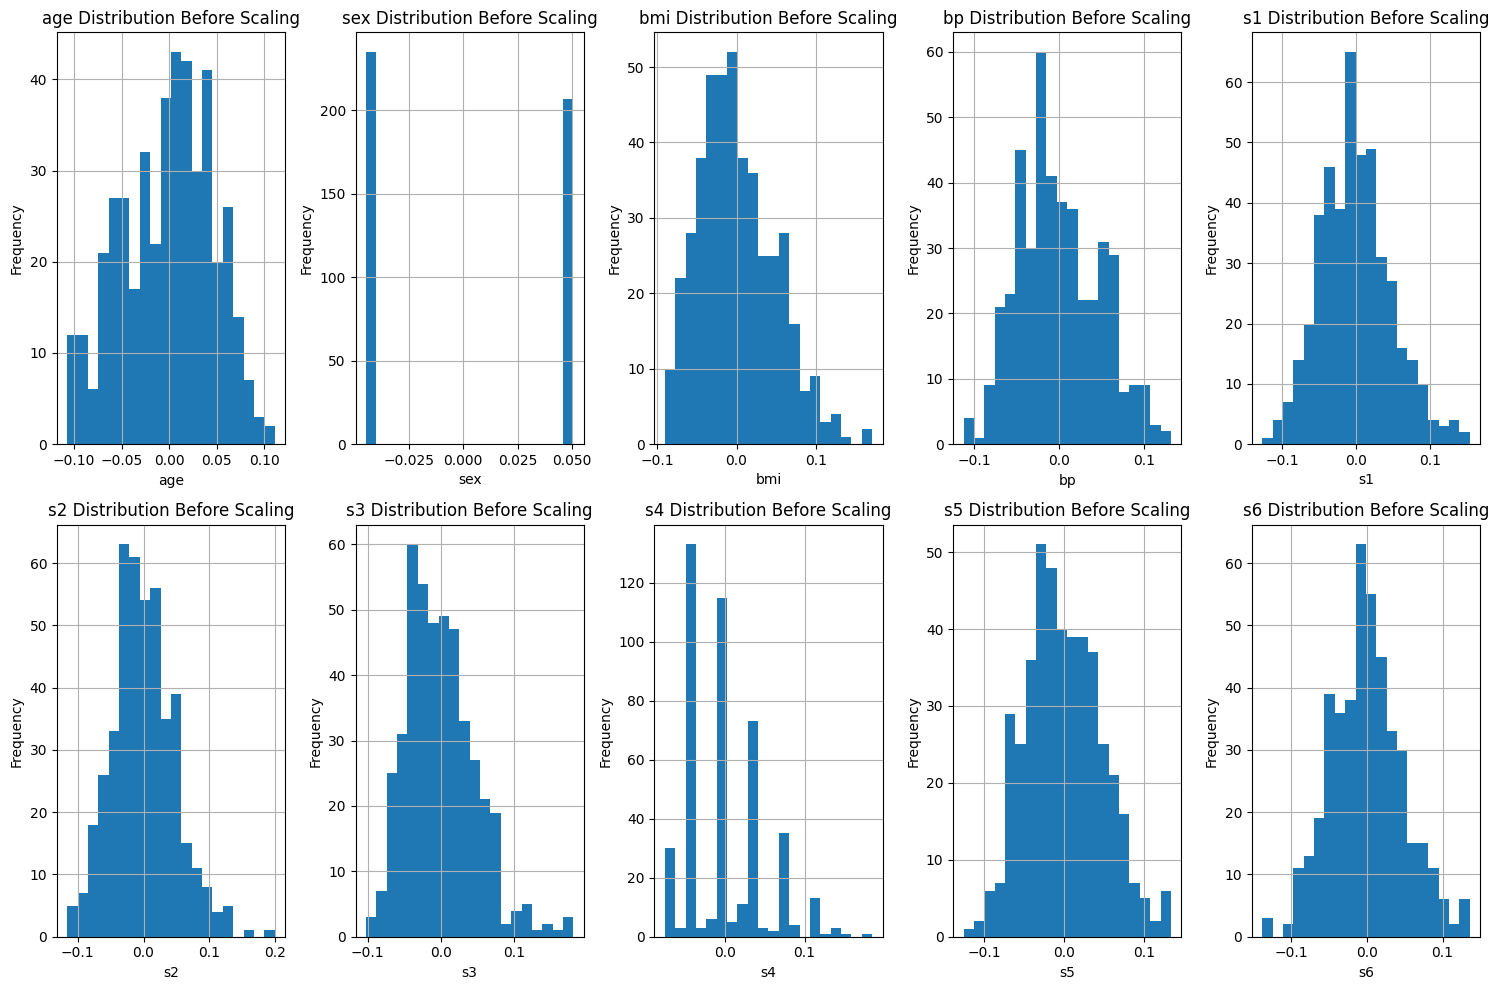

In [6]:
# Visualize distributions before scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    X[col].hist(bins=20)
    plt.title(f'{col} Distribution Before Scaling')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Reasoning**:
Create subplots to visualize the distributions of scaled features using histograms.



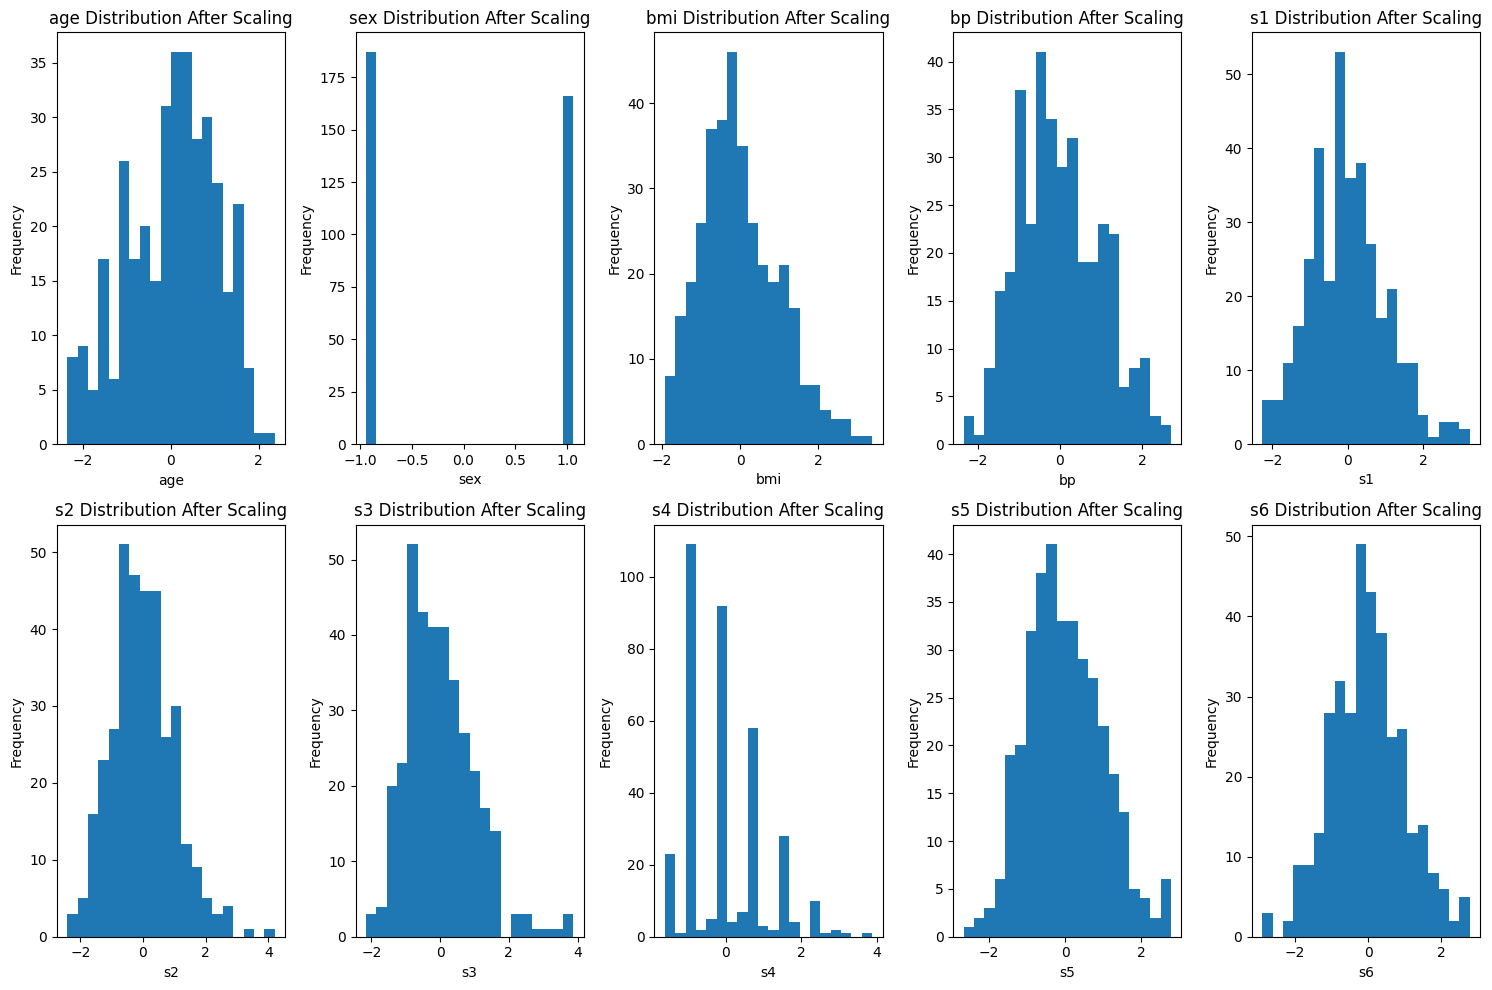

In [7]:
# Visualize distributions after scaling
plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(2, 5, i + 1)
    plt.hist(X_train[:, i], bins=20)
    plt.title(f'{col} Distribution After Scaling')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Model training

### Subtask:
Visualize the feature importances from the trained model to understand which features are most influential in the predictions.


**Reasoning**:
Extract feature importances, create a DataFrame, sort it, and create a bar plot to visualize the importances.



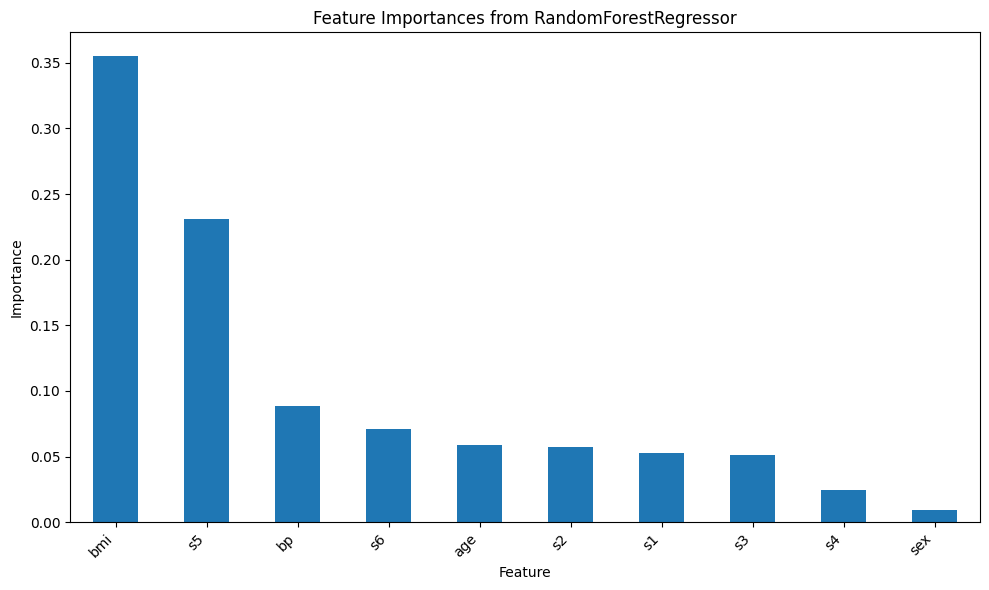

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = model.feature_importances_

# Create a pandas Series with feature names and importances
feature_importance_series = pd.Series(feature_importances, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()